<a href="https://colab.research.google.com/github/ashwinsathish/DPS_task/blob/main/Acc_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Monthly_accidents.csv")
print(df.iloc[:5, :5])

       MONATSZAHL AUSPRÄGUNG  JAHR   MONAT  WERT
0  Alkoholunfälle  insgesamt  2022  202201   NaN
1  Alkoholunfälle  insgesamt  2022  202202   NaN
2  Alkoholunfälle  insgesamt  2022  202203   NaN
3  Alkoholunfälle  insgesamt  2022  202204   NaN
4  Alkoholunfälle  insgesamt  2022  202205   NaN


In [3]:
# translating column names to English 
df = df.rename(columns={"MONATSZAHL": "Category", "AUSPRÄGUNG": "Accident-Type", "JAHR": "Year", "MONAT": "Month", "WERT": "Value"})

In [4]:
print(df.iloc[:5, :])

         Category Accident-Type  Year   Month  Value  VORJAHRESWERT  \
0  Alkoholunfälle     insgesamt  2022  202201    NaN           16.0   
1  Alkoholunfälle     insgesamt  2022  202202    NaN           14.0   
2  Alkoholunfälle     insgesamt  2022  202203    NaN           24.0   
3  Alkoholunfälle     insgesamt  2022  202204    NaN           16.0   
4  Alkoholunfälle     insgesamt  2022  202205    NaN           24.0   

   VERÄND_VORMONAT_PROZENT  VERÄND_VORJAHRESMONAT_PROZENT  \
0                      NaN                            NaN   
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN                            NaN   
4                      NaN                            NaN   

   ZWÖLF_MONATE_MITTELWERT  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


In [5]:
# filtering the table to the required no. of columns
new_df = df[["Category", "Accident-Type", "Year", "Month", "Value"]]
new_df.to_csv("Monthly_accidents_filtered.csv", index=False)
print(new_df.iloc[:5, :])

         Category Accident-Type  Year   Month  Value
0  Alkoholunfälle     insgesamt  2022  202201    NaN
1  Alkoholunfälle     insgesamt  2022  202202    NaN
2  Alkoholunfälle     insgesamt  2022  202203    NaN
3  Alkoholunfälle     insgesamt  2022  202204    NaN
4  Alkoholunfälle     insgesamt  2022  202205    NaN


In [6]:
new_df1 = new_df.dropna()
new_df1.head()

,Category,Accident-Type,Year,Month,Value
12,Alkoholunfälle,insgesamt,2021,Summe,383.0
13,Alkoholunfälle,insgesamt,2021,202101,16.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0


In [7]:
# dropping records of accidents after 2020
new_df1.drop(new_df1[new_df1["Year"] > 2020].index, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
new_df1.head()

,Category,Accident-Type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0


In [9]:
# dropping columns that contain aggregate values for a year
df2 = new_df1[~new_df1["Month"].str.contains("Summe")]
df2

,Category,Accident-Type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [10]:
df2.loc[df2["Month"].str.isnumeric(), "Month"] = df2.loc[df2["Month"].str.isnumeric(), "Month"].astype(str).str[-2:]
df2

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Category,Accident-Type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,01,28.0
27,Alkoholunfälle,insgesamt,2020,02,40.0
28,Alkoholunfälle,insgesamt,2020,03,27.0
29,Alkoholunfälle,insgesamt,2020,04,26.0
30,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,08,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,09,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [11]:
print(df2["Month"].dtypes)

object


In [12]:
df2['Month'] = df2['Month'].astype(int)
df2

<ipython-input-12-f1b50d7b9a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Month'].astype(int)


,Category,Accident-Type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,1,28.0
27,Alkoholunfälle,insgesamt,2020,2,40.0
28,Alkoholunfälle,insgesamt,2020,3,27.0
29,Alkoholunfälle,insgesamt,2020,4,26.0
30,Alkoholunfälle,insgesamt,2020,5,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [13]:
df2['Date'] = pd.to_datetime(df2['Year'].astype(str) + df2['Month'].astype(str), format='%Y%m')
df2

<ipython-input-13-19d5d463617a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Year'].astype(str) + df2['Month'].astype(str), format='%Y%m')


,Category,Accident-Type,Year,Month,Value,Date
26,Alkoholunfälle,insgesamt,2020,1,28.0,2020-01-01
27,Alkoholunfälle,insgesamt,2020,2,40.0,2020-02-01
28,Alkoholunfälle,insgesamt,2020,3,27.0,2020-03-01
29,Alkoholunfälle,insgesamt,2020,4,26.0,2020-04-01
30,Alkoholunfälle,insgesamt,2020,5,40.0,2020-05-01
...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0,2000-08-01
2082,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0,2000-09-01
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0,2000-10-01
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0,2000-11-01


## Visulaizing data

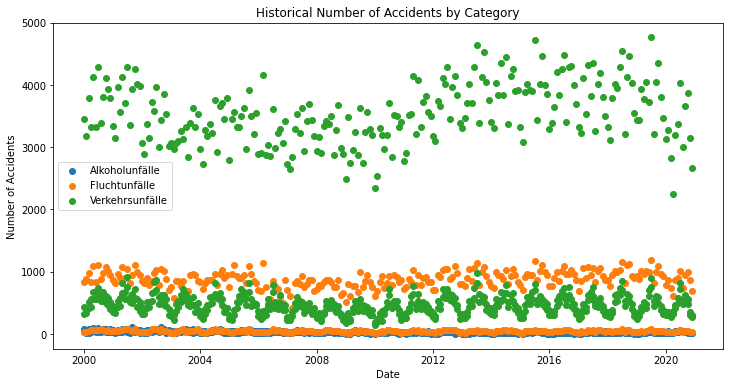

In [14]:
groups = df2.groupby('Category')

plt.figure(figsize=(12, 6))

# creating a scatter plot for each group
for name, group in groups:
    plt.scatter(group['Date'], group['Value'], label=name)

plt.title("Historical Number of Accidents by Category")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()

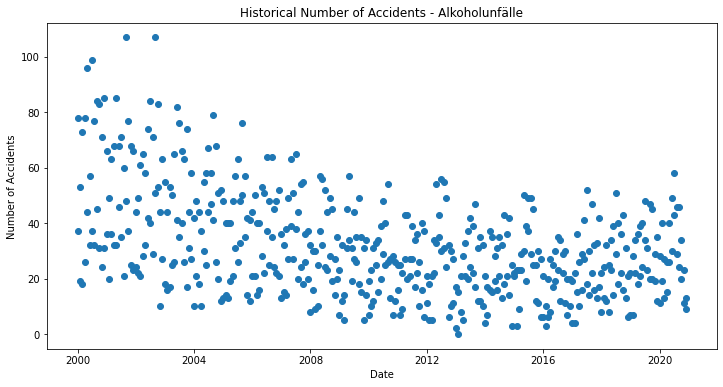

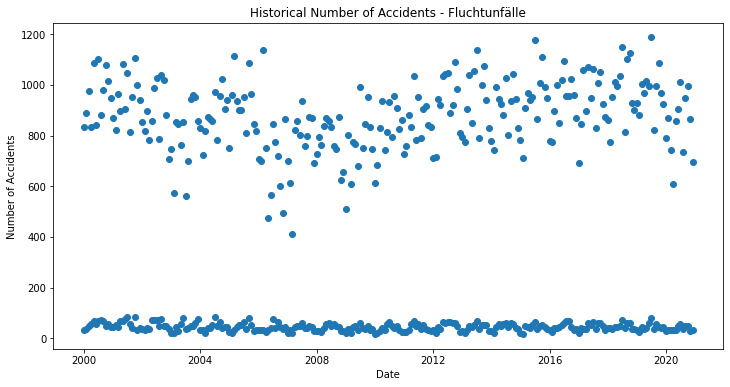

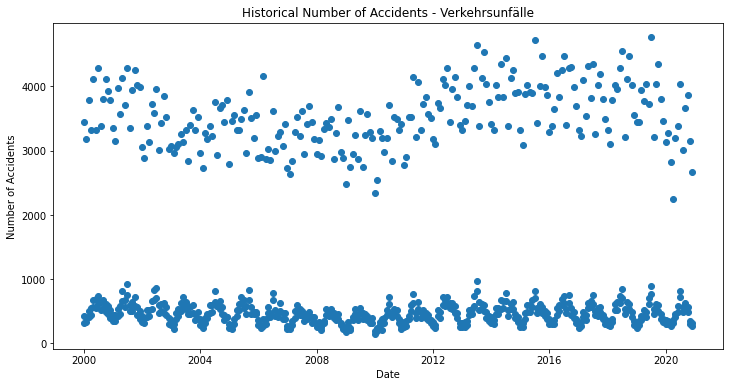

In [15]:
groups2 = df2.groupby('Category')

# creating a scatter plot for each group
for name, group in groups2:
    plt.figure(figsize=(12, 6))  # new figure for each group
    plt.scatter(group['Date'], group['Value'])
    plt.title(f"Historical Number of Accidents - {name}")
    plt.xlabel("Date")
    plt.ylabel("Number of Accidents")

plt.show()

In [16]:
# Get unique categories from the dataframe
categories = df2['Category'].unique()

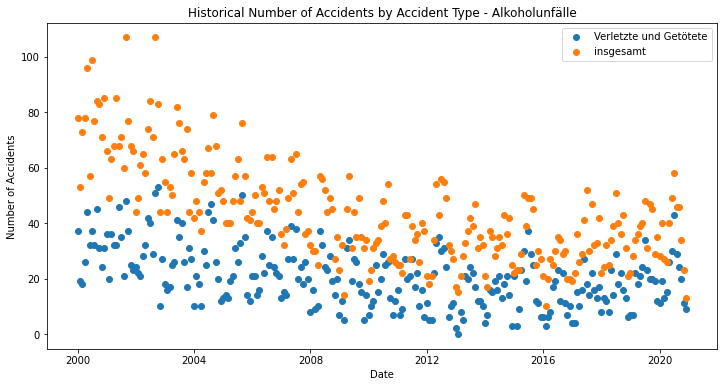

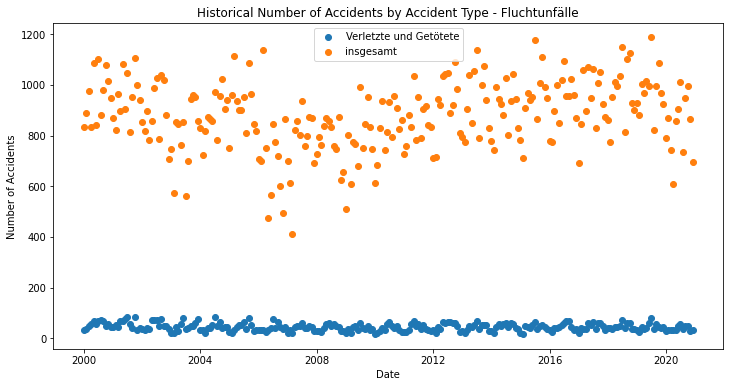

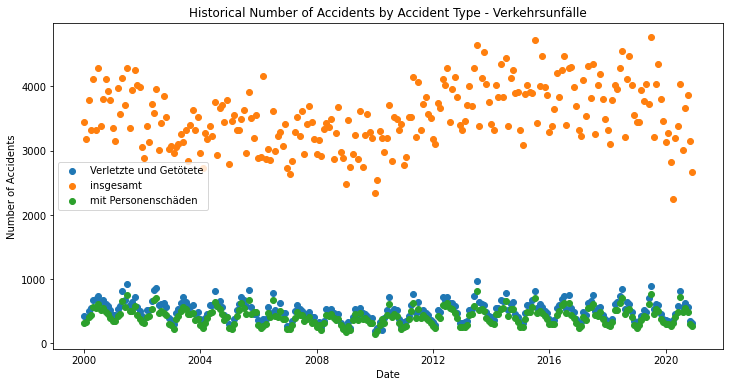

In [17]:
# Iterate over the categories and create a separate plot for each category
for category in categories:
    data = df2[df2['Category'] == category]
    plt.figure(figsize=(12, 6))
    
    # grouping the data by "Accident-Type" column
    groups = data.groupby('Accident-Type')
    
    # scatter plot for each group
    for name, group in groups:
        plt.scatter(group['Date'], group['Value'], label=name)
    
    plt.title(f"Historical Number of Accidents by Accident Type - {category}")
    plt.xlabel("Date")
    plt.ylabel("Number of Accidents")
    plt.legend()
    plt.show()

## XG Boost model

In [18]:
# creating 2 new columns to encode Catgeory and Accident-Type
df2['Category_Code'] = pd.factorize(df2['Category'])[0] + 1
df2['Accident_Type_Code'] = pd.factorize(df2['Accident-Type'])[0] + 1

<ipython-input-18-97779b68cbba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category_Code'] = pd.factorize(df2['Category'])[0] + 1
<ipython-input-18-97779b68cbba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Accident_Type_Code'] = pd.factorize(df2['Accident-Type'])[0] + 1


In [19]:
df2

,Category,Accident-Type,Year,Month,Value,Date,Category_Code,Accident_Type_Code
26,Alkoholunfälle,insgesamt,2020,1,28.0,2020-01-01,1,1
27,Alkoholunfälle,insgesamt,2020,2,40.0,2020-02-01,1,1
28,Alkoholunfälle,insgesamt,2020,3,27.0,2020-03-01,1,1
29,Alkoholunfälle,insgesamt,2020,4,26.0,2020-04-01,1,1
30,Alkoholunfälle,insgesamt,2020,5,40.0,2020-05-01,1,1
...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0,2000-08-01,3,2
2082,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0,2000-09-01,3,2
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0,2000-10-01,3,2
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0,2000-11-01,3,2


In [20]:
# Counting the number of unique category and accident-type codes
category_counts = df2.groupby(['Category_Code'])['Category'].nunique()
accident_type_counts = df2.groupby(['Accident_Type_Code'])['Accident-Type'].nunique()

print("Number of unique category codes:", len(category_counts))
print(category_counts)

print("Number of unique accident-type codes:", len(accident_type_counts))
print(accident_type_counts)

Number of unique category codes: 3
Category_Code
1    1
2    1
3    1
Name: Category, dtype: int64
Number of unique accident-type codes: 3
Accident_Type_Code
1    1
2    1
3    1
Name: Accident-Type, dtype: int64


In [21]:
# grouping by Category_Code and Accident_Type_Code and aggregate the corresponding strings
category_map = df2.groupby('Category_Code').agg({'Category': 'first'})
accident_map = df2.groupby('Accident_Type_Code').agg({'Accident-Type': 'first'})

print("Category Mappings:")
print(category_map)

print("\nAccident-Type Mappings:")
print(accident_map)

Category Mappings:
                      Category
Category_Code                 
1               Alkoholunfälle
2                Fluchtunfälle
3              Verkehrsunfälle

Accident-Type Mappings:
                             Accident-Type
Accident_Type_Code                        
1                                insgesamt
2                   Verletzte und Getötete
3                      mit Personenschäden


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import xgboost as xgb
import numpy as np

In [23]:
# Converting the features and target variable to numpy arrays
X = df2[['Category_Code', 'Accident_Type_Code', 'Year', 'Month']].values
y = df2['Value'].values

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [26]:
y_pred = xgb_model.predict(X_test)

# performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Explained Variance Score:", evs)
print("Max Error:", me)
print("Mean Absolute Error:", mae)

Mean Squared Error: 9506.709389506654
R-squared Score: 0.9923082660222924
Explained Variance Score: 0.9923104190196473
Max Error: 1075.558349609375
Mean Absolute Error: 47.253125779014134


In [27]:
_# Print the category and accident-type mappings
print("Category Mappings:")
print(category_map)

print("\nAccident-Type Mappings:")
print(accident_map)

Category Mappings:
                      Category
Category_Code                 
1               Alkoholunfälle
2                Fluchtunfälle
3              Verkehrsunfälle

Accident-Type Mappings:
                             Accident-Type
Accident_Type_Code                        
1                                insgesamt
2                   Verletzte und Getötete
3                      mit Personenschäden


In [28]:
new_features = np.array([[1, 1, 2021, 1]]) # category code = 1 (Alkoholunfälle), accident type code = 1 (insgesamt), year = 2021, month = 01
predicted_value = xgb_model.predict(new_features)

print("Predicted Value by XGB model:", predicted_value)

Predicted Value by XGB model: [25.912327]


## Neural network

In [29]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers

# Splitting the data into training and testing datasets
X = df2[['Category_Code', 'Accident_Type_Code', 'Year', 'Month']]
y = df2['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compiling the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
r2score = r2_score(y_test, y_pred)
print("Test loss:", score[0])
print("Test MAE:", score[1])
print("R2 score:", r2score)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
45/45 [==============================] - 2s 14ms/step - loss: 2061658.7500 - mae: 794.2338 - val_loss: 1732213.8750 - val_mae: 705.9146
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 2007606.6250 - mae: 770.5137 - val_loss: 1600538.5000 - val_mae: 653.5534
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 1629549.3750 - mae: 673.1562 - val_loss: 1012288.1875 - val_mae: 508.7835
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 839874.9375 - mae: 566.3672 - val_loss: 464132.4062 - val_mae: 526.3376
Epoch 5/50
45/45 [==============================] - 0s 6ms/step - loss: 493201.6562 - mae: 522.7479 - val_loss: 342239.5938 - val_mae: 454.8259
Epoch 6/50
45/45 [==============================] - 0s 7ms/step - loss: 375799.0312 - mae: 447.0938 - val_loss: 271972.8125 - val_mae: 385.0198
Epoch 7/50
45/45 [==============================] - 0s 7ms/step - loss: 322166.3750 - mae: 390.9524 - val_loss: 228819.8750 - val

In [30]:
new_data = np.array([[1, 1, 2021, 1]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Predicted value:", prediction[0][0])

1/1 [==============================] - 0s 23ms/step
Predicted value: 20.817627


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
y_pred = model.predict(X_test)
X_test_df = pd.DataFrame(X_test, columns=['Category_Code', 'Accident_Type_Code', 'Year', 'Month'])

12/12 [==============================] - 0s 2ms/step


In [32]:
# Combine month and year columns to create date column
X_test_df['Date'] = X_test_df['Year'].astype(str) + '-' + X_test_df['Month'].astype(str)

In [33]:
# Set date column as index and sort by index
X_test_df = X_test_df.set_index('Date')
X_test_df = X_test_df.sort_index()

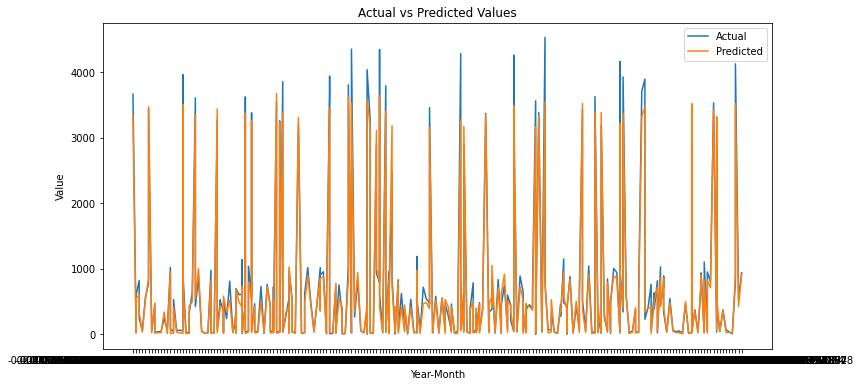

In [34]:
# Create a line plot of actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(X_test_df.index, y_test, label='Actual')
plt.plot(X_test_df.index, y_pred, label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [36]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Acc_pred model/nn_acc_pred.h5')